In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score
import seaborn as sns

### __True Positive (TP)__: A result that was predicted as positive by the classification model and also is positive
### __True Negative (TN)__: A result that was predicted as negative by the classification model and also is negative
### __False Positive (FP)__: A result that was predicted as positive by the classification model but actually is negative
### __True Positive (FN)__: A result that was predicted as nagative by the classification model but actually is positive


#### __Accuracy__ = (TP+TN)/(TP+TN+FP+FN)

### __Recall__ or __Sensitivity__ = __TP / (TP+FN)__
##### It's the number of positive correctly predicted by the model

### Precision.
##### Precision it is a measure of amongst all the positive predictions, How many of them were actually positive. mathematically
### __Precison__ = __TP / (TP+FP)__



In [2]:
info ='https://raw.githubusercontent.com/olivierla412/Files/main/diabetes.csv'

In [3]:
data = pd.read_csv(info)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


 #### from the discribe method we say that there is no missing value.

In [8]:
## let's see how data distributed for every column


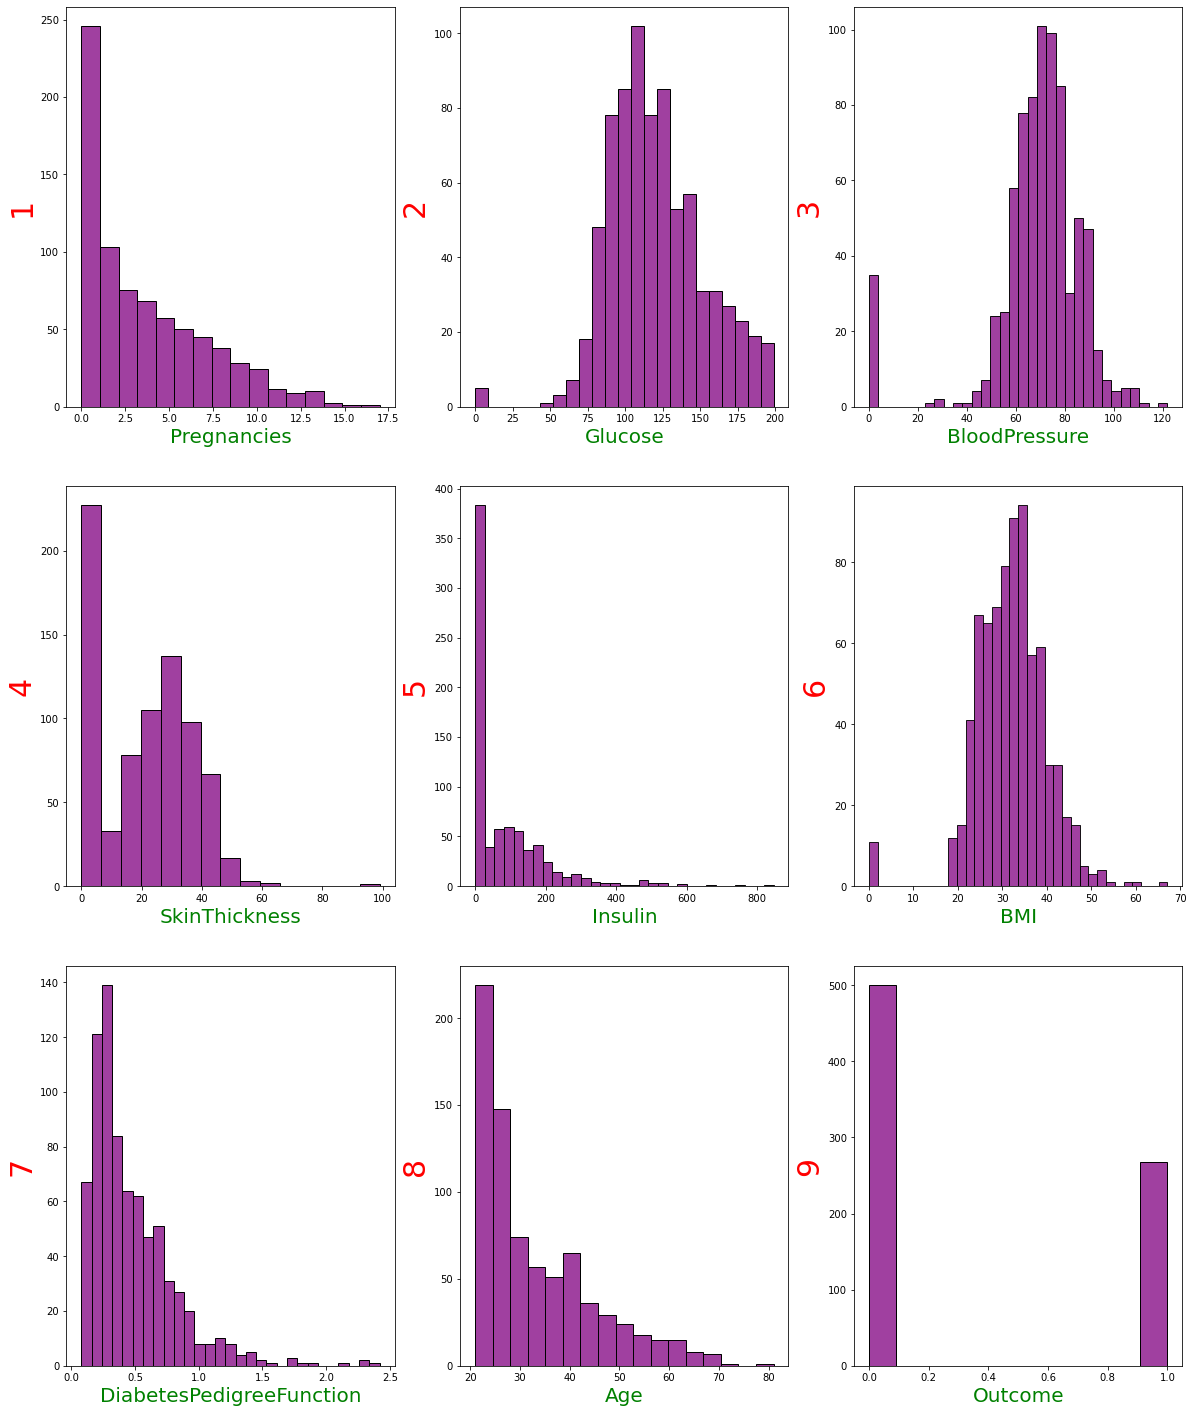

In [14]:
plt.figure(figsize=(20,25),facecolor='white')
plot_no =1

for column in data:
    if plot_no <= 9: ## as there are 9 columns
        ax = plt.subplot(3,3,plot_no)
        sns.histplot(data[column],color='purple') ## kind of plot
        plt.xlabel(column,fontsize = 20,color='green')
        plt.ylabel(plot_no,fontsize = 30,color='red')
    plot_no+=1
    
plt.show()    
        

In [15]:
data.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


In [16]:
# replace the zero values by the mean of the column

data['BMI']=data['BMI'].replace(0,data['BMI'].mean())

data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())

data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].mean())

data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())

In [34]:
pd.options.display.max_rows = 11

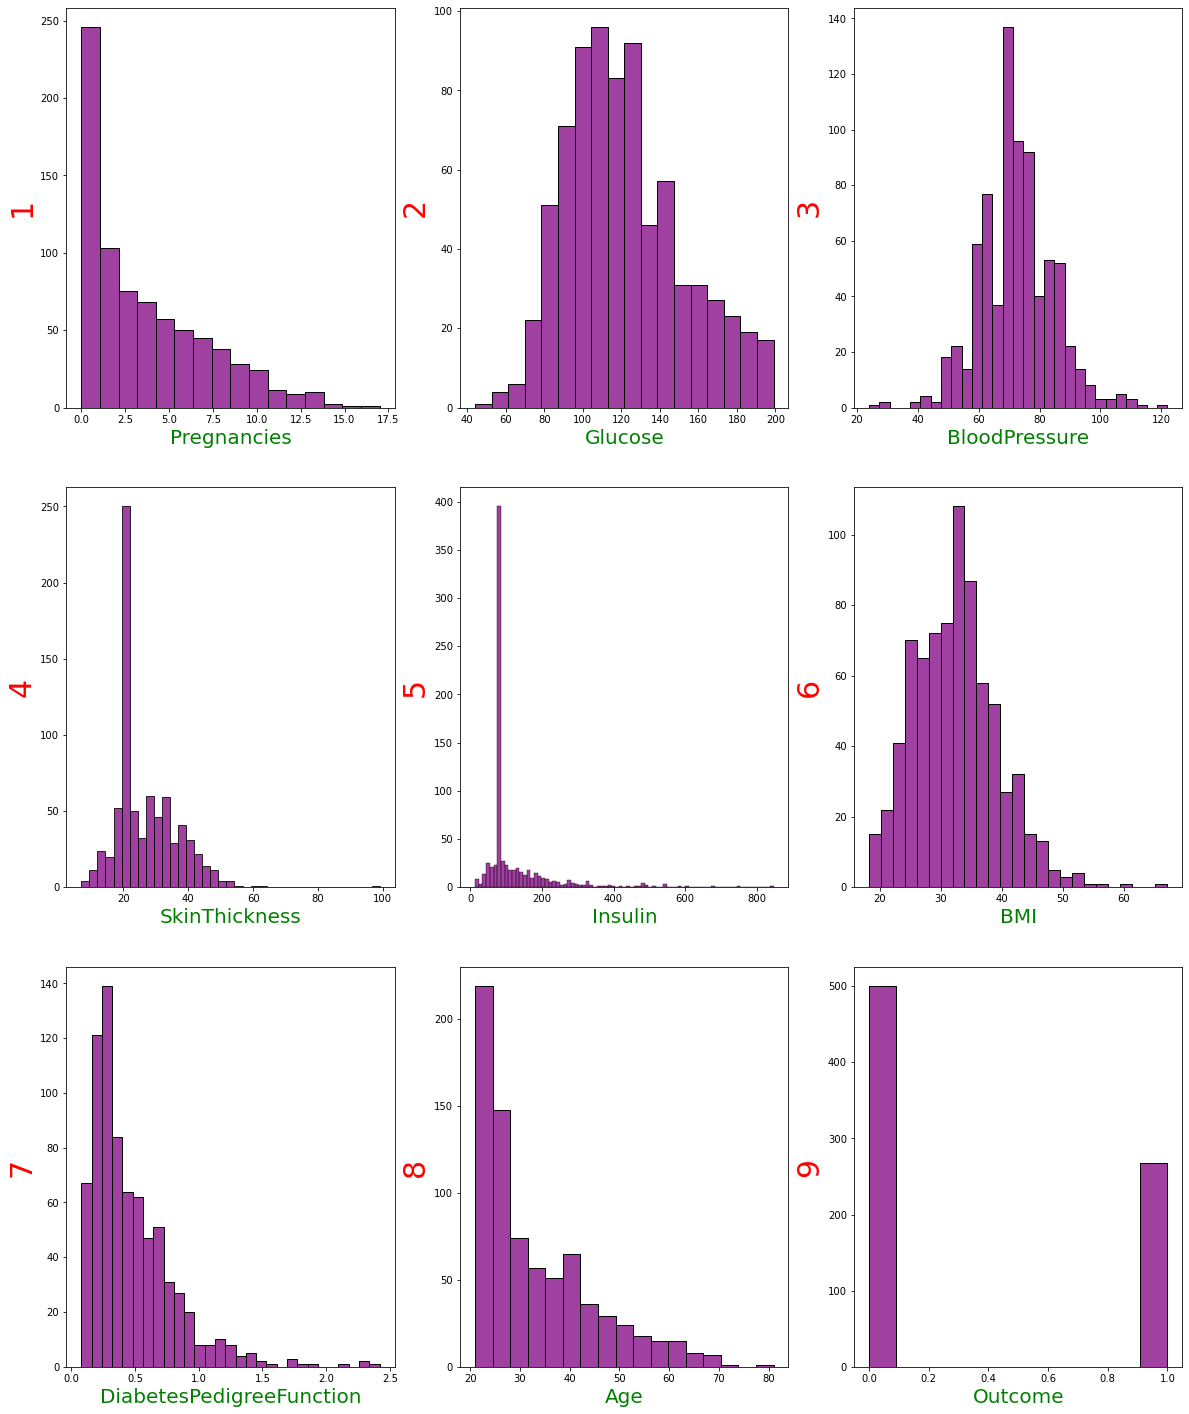

In [22]:
plt.figure(figsize=(20,25),facecolor='white')
plot_no =1

for column in data:
    if plot_no <= 9: ## as there are 9 columns
        ax = plt.subplot(3,3,plot_no)
        sns.histplot(data[column],color='purple') ## kind of plot
        plt.xlabel(column,fontsize = 20,color='green')
        plt.ylabel(plot_no,fontsize = 30,color='red')
    plot_no+=1
    
plt.show()  

In [23]:
data.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,79.799479,33.6,0.627,50,1


In [45]:
q = data['Pregnancies'].quantile(0.90)
# we are removing the top 10% data from the Pregnancies column
data_cleaned = data[data['Pregnancies'] < q]

q = data_cleaned['BMI'].quantile(0.97)
# we are removing the top 5% data from the BMI column
data_cleaned= data_cleaned[data_cleaned['BMI']< q]

q = data_cleaned['SkinThickness'].quantile(0.95)
# we are removing the top 5% data from the BMI column
data_cleaned = data_cleaned[data_cleaned['SkinThickness'] <q]

q = data_cleaned['Insulin'].quantile(0.75)
# we are removing the top 10% data from the BMI column
data_cleaned = data_cleaned[data_cleaned['Insulin'] <q]

q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.90)
# we are removing the top 10% data from the BMI column
data_cleaned = data_cleaned[data_cleaned['DiabetesPedigreeFunction'] <q]

q = data_cleaned['Age'].quantile(0.90)
# we are removing the top 10% data from the BMI column
data_cleaned = data_cleaned[data_cleaned['Age'] <q]




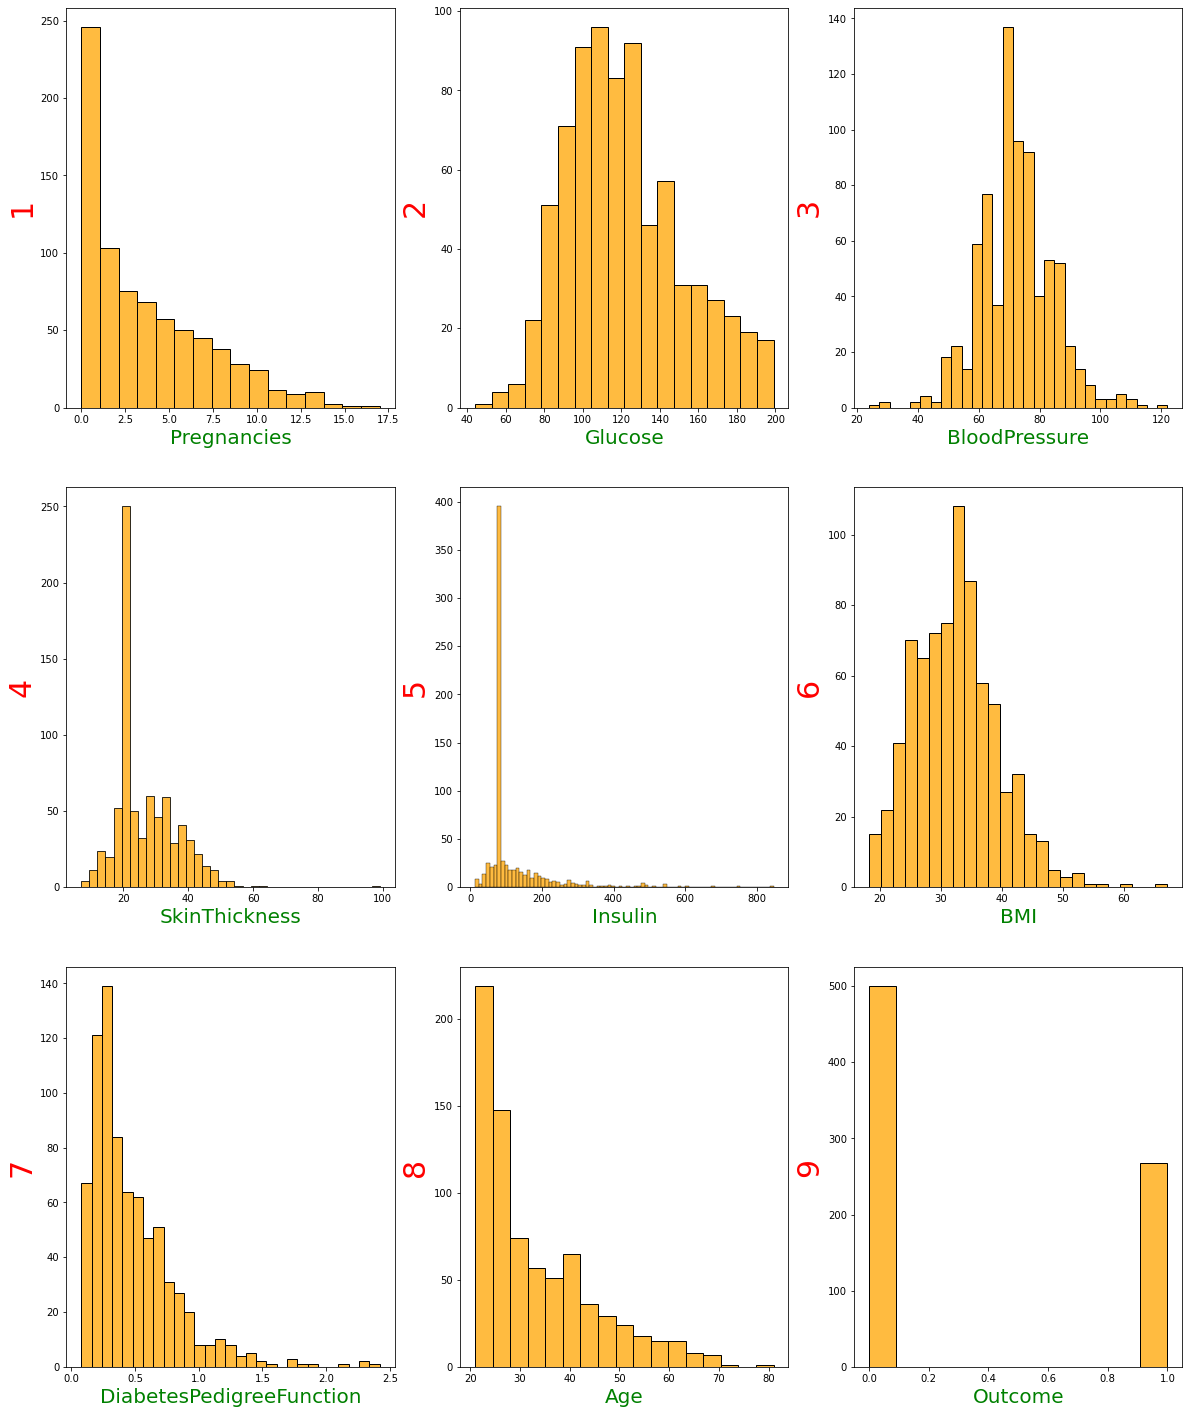

In [46]:
plt.figure(figsize=(20,25),facecolor='white')
plot_no =1

for column in data_cleaned:
    if plot_no <= 9: ## as there are 9 columns
        ax = plt.subplot(3,3,plot_no)
        sns.histplot(data[column],color='orange') ## kind of plot
        plt.xlabel(column,fontsize = 20,color='green')
        plt.ylabel(plot_no,fontsize = 30,color='red')
    plot_no+=1
    
plt.show()  

1


In [47]:
data_cleaned.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000
mean,2.885638,110.498597,70.191084,23.654532,76.969353,30.538958,0.355622,28.529255,0.223404
std,2.320967,26.551634,11.443761,7.166511,16.260384,6.104404,0.178036,7.289020,0.417082
min,0.000000,44.000000,24.000000,10.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,92.000000,64.000000,20.536458,79.799479,26.000000,0.219750,22.000000,0.000000
50%,2.000000,106.500000,69.105469,20.536458,79.799479,30.050000,0.304500,26.000000,0.000000
75%,4.250000,123.000000,76.000000,28.000000,79.799479,34.425000,0.471250,32.000000,0.000000
max,8.000000,196.000000,122.000000,42.000000,116.000000,45.700000,0.787000,49.000000,1.000000


In [49]:
X = data_cleaned.drop(columns=['Outcome'])

Y = data_cleaned['Outcome']

### Let's check the relatioship between the __features__ and the __label__

##### Before fit our data to the model ,let's see by visualize the relationship bw the features and the label

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/pyt

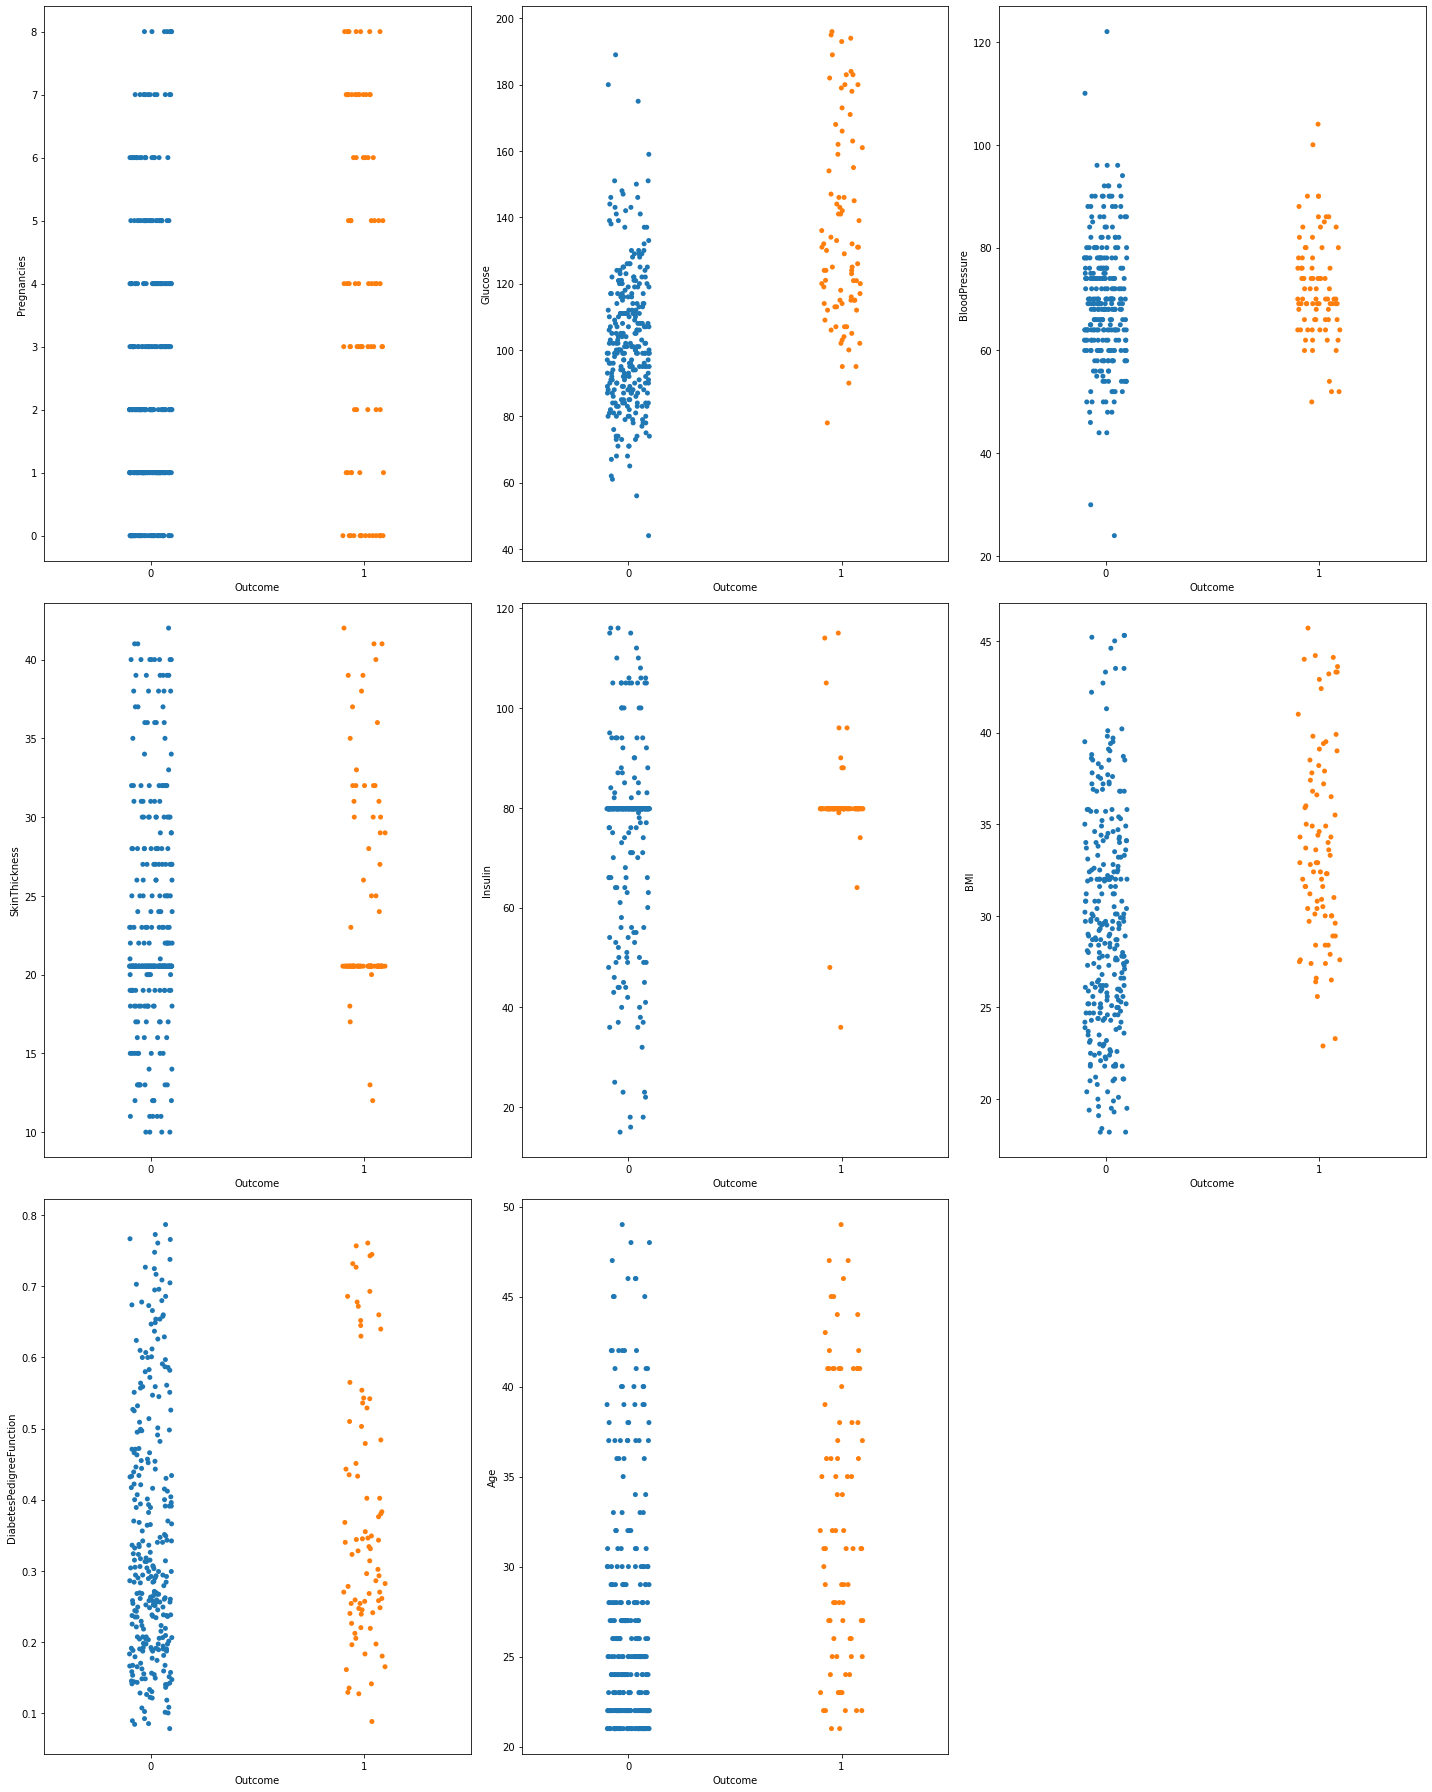

In [61]:
plt.figure(figsize=(20,25), facecolor='white')
plot_no = 1

for column in X:
    if plot_no <= 9:
        ax = plt.subplot(3,3,plot_no)
        sns.stripplot(Y, X[column])
        
        
    plot_no+=1
plt.tight_layout()    
    

### From the above graphs, we can say that all the features are important..

# let's use __VIF__ for __Feature__ vs __Feature__ checking.

#### This is called multicollinearity ( __Feature__ vs __Feature__ )

In [54]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

#### This is how our data looks link after scalling. 
#### Great , now we will check multicollinearity using VIF(Variance Inflaction Factor)

In [63]:
##X_scaler

In [57]:
## Finding Variance Inflation factor in each scaled column

## e.i X_scaler.shape[1] 

# VIF = (1/(1 -R2))

In [58]:
vif = pd.DataFrame()
## list comprehension
vif['vif'] = [variance_inflation_factor(X_scaler,i) for i in range(X_scaler.shape[1])]
## .shape() / output will be (rows,column)
## rows = 0 index
## columns = 1 index
vif['features'] = X.columns

## let's check the values
vif

,vif,features
0,1.502143,Pregnancies
1,1.174945,Glucose
2,1.190155,BloodPressure
3,1.304933,SkinThickness
4,1.073261,Insulin
5,1.424600,BMI
6,1.016609,DiabetesPedigreeFunction
7,1.731371,Age


## if VIF >= 5 , i.e there is a problem of multicollinearity (exist)

In [60]:
### here all the score of vif are less than 5 , therefore 
# multicollinearity is not exist for our dataset
#e.i there is no relation bw feature vs  feature

##### All the VIF values are less than 5 and are very low. That's mean no multicollinearity.
##### Now we can go ahead and fitting our data to the model.
##### Before that , let's split our data into test and training set

In [64]:
x_train,x_test,y_train,y_test = train_test_split(X_scaler,Y,test_size=0.25,random_state=365)

In [65]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [72]:
import pickle
## writing different model files to file
with open('modelForPrediction.sav','wb') as f:
    pickle.dump(log_reg, f)
with open('sandardScllar.sav','wb') as f:
    pickle.dump(scalar, f)
    

'e'

#### Let's see how well our model performs on the data set

In [73]:
y_pred = log_reg.predict(x_test)

In [76]:
## let use the metric  accuracy_score() and check the accuracy

accuracy = accuracy_score(y_test,y_pred)
accuracy


0.8404255319148937

#### In case of classification we don't care too much about the accurancy. But the confusion matrix

## Confusion Matrix

In [77]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat 


array([[68,  3],
       [12, 11]])

In [78]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [79]:
## Breaking down the formula for accuracy

In [80]:
accuracy_mannual = (true_positive + true_negative) /(true_positive+false_positive+false_negative+true_negative)
accuracy_mannual

0.8404255319148937

### Precision

In [81]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9577464788732394

### Recall

In [83]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.85

### F1_Score 

In [87]:
F1_Score = 2*(Recall * Precision)/(Recall + Precision)
F1_Score

0.9006622516556291

### Area Under the Curve __AUC__

In [88]:
auc = roc_auc_score(y_test, y_pred)
auc

0.7180036742192284

### ROC

In [90]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [91]:
fpr

array([0.        , 0.04225352, 1.        ])

In [92]:
tpr

array([0.        , 0.47826087, 1.        ])

In [93]:
thresholds

array([2, 1, 0])

### Representationm

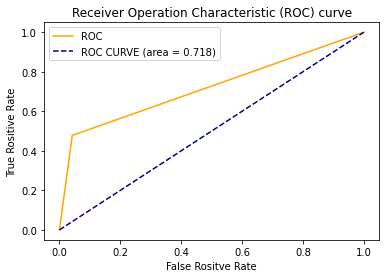

In [99]:
plt.plot(fpr,tpr, color ='orange',label ='ROC')
plt.plot([0,1], [0,1], color ='darkblue',linestyle ='--', label='ROC CURVE (area = %0.3f)'%auc)
plt.xlabel('False Rositve Rate')
plt.ylabel('True Rositive Rate')
plt.title('Receiver Operation Characteristic (ROC) curve')
plt.legend()
plt.show()

 ## End of the Logistic Regrssion